In [1]:
import pytraj as pyt
import numpy as np

/home/joel/anaconda3/envs/mds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# carga de la trayectoria
prod = pyt.load(filename='./4_prod/mxs_cdk2_prod.nc', top = './mxs_cdk2.prmtop', mask='@CA')

In [3]:
prod

pytraj.Trajectory, 1000 frames: 
Size: 0.006661 (GB)
<Topology: 298 atoms, 298 residues, 298 mols, PBC with box type = truncoct>
           

In [16]:
pyt.load?

In [4]:
rmsd_1 = pyt.rmsd( traj= prod, ref=0, nofit=False, mask=':6-292')
rmsd_1

array([0.        , 0.75610933, 0.81216602, ..., 1.86584617, 1.83295131,
       1.791466  ])

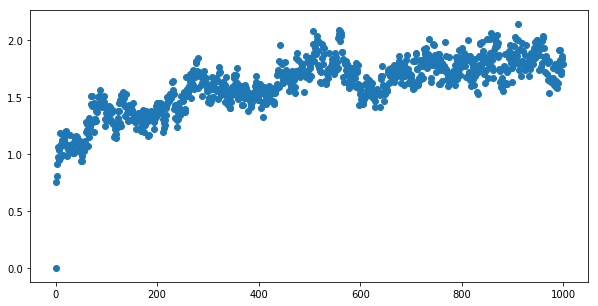

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure( figsize=(10, 5) )
plt.scatter(x = np.arange(0, 1000, 1), y = rmsd_1)
plt.show();

In [18]:
# Calculo de la estructura media
avg_stc = pyt.mean_structure( prod )
avg_stc

<Frame with 298 atoms>

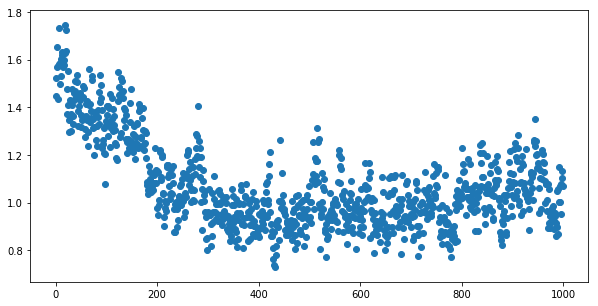

In [19]:
# Recalculo del RMSD pltplt.scatter(projection_data[0], projection_data[1], marker='o', c=range(traj.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #').scatter(projection_data[0], projection_data[1], marker='o', c=range(traj.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')
rmsd_2 = pyt.rmsd( prod, ref= avg_stc, mask='6-292')

plt.figure( figsize=(10, 5) )
plt.scatter(x = np.arange(0, 1000, 1), y = rmsd_2)
plt.show();

In [22]:
# Se superpone toda la trayectoria al frame promedio
pyt.superpose( prod, ref = avg_stc)

pytraj.Trajectory, 1000 frames: 
Size: 0.006661 (GB)
<Topology: 298 atoms, 298 residues, 298 mols, PBC with box type = truncoct>
           

In [25]:
# calculo del pca
pca = pyt.pca( traj = prod, mask='@CA', n_vecs=2)

In [27]:
pca

(array([[15.735016 , 16.54573  , 19.136032 , ..., -7.629164 , -5.266226 ,
         -5.2411475],
        [ 8.306742 ,  8.328458 ,  7.364425 , ...,  1.8640922,  4.6075764,
          2.8291674]], dtype=float32),
 (array([101.16086808,  37.42353367]),
  array([[ 0.03988864,  0.01744719, -0.03954964, ..., -0.12614024,
           0.1800914 , -0.12771427],
         [ 0.02407897, -0.03446656,  0.02406836, ..., -0.10278893,
           0.11601774, -0.12471796]])))